**LSTM Based N-gram predictor**    

In this model - given past n characters, we try to predict the next 'k' characters. Thus, by parsing the output to the first ' ' or space character, we
can obtain the next predicted workd.

Pros - 

1.   This model can be helpful for also predicting the remaining characters of 
  a word given first few characters of it.
2.   This model is computationally less intensive, as the output layer has only a few output choices unlike the word based model which has a huge output softmax (which is computationally expensive). Here the output softmax has only the size equal to that of the number of unique characters in the given language which is very low as compared to all pollible dictionary words. 

Cons - 


1.   The output of this model needs post processing, as the model outputs a sequence of characters, one needs to parse the word and check if it is valid by a dictionary lookup.




In [0]:
import sys
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils

In [3]:
from google.colab import drive
drive.mount('/gdrive')

import os

print(os.listdir('../gdrive/My Drive/NLP'))
os.chdir('../gdrive/My Drive/NLP/')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
['LSTM', 'weights-improvement-01-2.7840-bigger.hdf5', 'weights-improvement-02-2.4281-bigger.hdf5', 'weights-improvement-03-2.2310-bigger.hdf5', 'weights-improvement-04-2.0931-bigger.hdf5', 'weights-improvement-05-1.9941-bigger.hdf5', 'weights-improvement-06-1.9257-bigger.hdf5', 'weights-improvement-07-1.8625-bigger.hdf5', 'weights-improvement-08-1.8065-bigger.hdf5', 'weights-improvement-09-1.7622-bigger.hdf5', 'weights-improvement-10-1.7197-bigger.hdf5', 'weights-improvement-11-1.6830-bigger.hdf5', 'weights-improvement-12-1.6474-bigger.hdf5', 'weights-improvement-13-1.6155-bigger.hdf5', 'weights-improvement-14-1.5896-bigger.hdf5', 'weights-improvement-15-1.5638-bigger.hdf5', 'weights-improvement-16-1.5373-bigger.hdf5', 'weights-improvement-17-1.5143-bigger.hdf5', 'weights-improvement-18-1.4919-bigger.hdf5', 'weights-improvement-19-1.4732-bigger.hdf5', 'weights-improvement-

In [0]:
!pip install tensorflow-gpu==1.14

In [0]:
# load ascii text and covert to lowercase
filename = "LSTM/republic.txt"
raw_text = open(filename, 'r', encoding='utf-8').read()
raw_text = raw_text.lower()

In [0]:
# create mapping of unique chars to integers, and a reverse mapping
chars = sorted(list(set(raw_text)))
char_to_int = dict((c, i) for i, c in enumerate(chars))
int_to_char = dict((i, c) for i, c in enumerate(chars))

In [17]:
# summarize the loaded data
n_chars = len(raw_text)
n_vocab = len(chars)
print ("Total Characters: ", n_chars)
print ("Total Vocab: ", n_vocab)

Total Characters:  1214385
Total Vocab:  59


In [0]:
# prepare the dataset of input to output pairs encoded as integers
seq_length = 10
dataX = []
dataY = []
for i in range(0, n_chars - seq_length, 1):
	seq_in = raw_text[i:i + seq_length]
	seq_out = raw_text[i + seq_length]
	dataX.append([char_to_int[char] for char in seq_in])
	dataY.append(char_to_int[seq_out])
n_patterns = len(dataX)

In [19]:
n_patterns = len(dataX)
print ("Total Patterns: ", n_patterns)

Total Patterns:  1214375


In [0]:
# reshape X to be [samples, time steps, features]
X = numpy.reshape(dataX, (n_patterns, seq_length, 1))
# normalize
X = X / float(n_vocab)

In [21]:
# one hot encode the output variable
y = np_utils.to_categorical(dataY)
# define the LSTM model
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(256))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [22]:
model.compile(loss='categorical_crossentropy', optimizer='adam')
# define the checkpoint
filepath="weights-improvement-{epoch:02d}-{loss:.4f}-bigger.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]
# fit the model
history = model.fit(X, y, epochs=10, batch_size=128, callbacks=callbacks_list)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/10
1214375/1214375 [==============================] - 273s 225us/step - loss: 2.3754

Epoch 00001: loss improved from inf to 2.37540, saving model to weights-improvement-01-2.3754-bigger.hdf5
Epoch 2/10
1214375/1214375 [==============================] - 280s 230us/step - loss: 1.9419

Epoch 00002: loss improved from 2.37540 to 1.94192, saving model to weights-improvement-02-1.9419-bigger.hdf5
Epoch 3/10
1214375/1214375 [==============================] - 277s 228us/step - loss: 1.7930

Epoch 00003: loss improved from 1.94192 to 1.79303, saving model to weights-improvement-03-1.7930-bigger.hdf5
Epoch 4/10
1214375/1214375 [==============================] - 276s 227us/step - loss: 1.7107

Epoch 00004: loss improved from 1.79303 to 1.71075, saving model to weights-improvement-04-1.7107-bigger.hdf5
Epoch 5/10
1214375/1214375 [==============================] - 276s 227us/step - loss: 1.6556

In [23]:
# serialize model to JSON
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import numpy
import os

model_json = model.to_json()
with open("model_10_char.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_10_char.h5")
print("Saved model to disk")

Saved model to disk


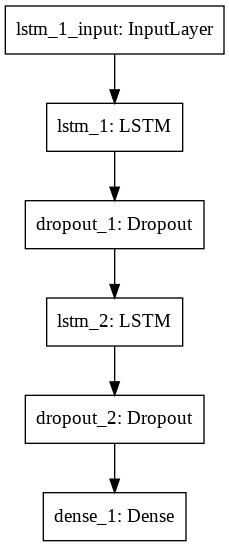

In [24]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [1]:
import matplotlib.pyplot as plt

#history = model.fit(x, y, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

# Plot training & validation accuracy values
"""plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()"""
"""
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()"""

"\n# Plot training & validation loss values\nplt.plot(history.history['loss'])\nplt.plot(history.history['val_loss'])\nplt.title('Model loss')\nplt.ylabel('Loss')\nplt.xlabel('Epoch')\nplt.legend(['Train', 'Test'], loc='upper left')\nplt.show()"

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10, 256)           264192    
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 256)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 59)                15163     
Total params: 804,667
Trainable params: 804,667
Non-trainable params: 0
_________________________________________________________________


In [0]:
# load the network weights
filename = "model_50.h5"
model.load_weights(filename)
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [0]:
model

In [42]:
# We will remove double quotes, !, ? $, #, etc
# specify to translate chars 
str1 = ""
# specify to replace with 
str2 = ""
# delete chars 
str3 = "\"!?#$%^&*+"

trg = raw_text
table = trg.maketrans(str1, str2, str3)
raw_text = trg.translate(table)

print(len(raw_text))


words = raw_text.split()
print (len(words))

words = [word.lower() for word in words]

import nltk
freq_dist = nltk.FreqDist(words)


from nltk.util import ngrams

esBigrams = ngrams(words, 2)


import collections
esBigramFreq = collections.Counter(esBigrams)


esTrigrams = ngrams(words, 3)
esTrigramFreq = collections.Counter(esTrigrams)

esTrigramFreq.most_common(10)

1212249
219238


[(('as', 'well', 'as'), 113),
 (('to', 'be', 'the'), 109),
 (('there', 'is', 'no'), 89),
 (('true,', 'he', 'said.'), 81),
 (('is', 'to', 'be'), 76),
 (('which', 'is', 'the'), 76),
 (('yes,', 'he', 'said,'), 76),
 (('the', 'idea', 'of'), 75),
 (('there', 'is', 'a'), 73),
 (('the', 'nature', 'of'), 70)]

In [60]:
esBigramFreq.most_common(1000)

[(('of', 'the'), 2371),
 (('in', 'the'), 1272),
 (('to', 'be'), 946),
 (('and', 'the'), 866),
 (('to', 'the'), 845),
 (('is', 'the'), 616),
 (('that', 'the'), 466),
 (('which', 'is'), 448),
 (('of', 'a'), 432),
 (('will', 'be'), 393),
 (('they', 'are'), 386),
 (('he', 'is'), 369),
 (('there', 'is'), 335),
 (('may', 'be'), 327),
 (('the', 'same'), 322),
 (('by', 'the'), 322),
 (('is', 'not'), 314),
 (('with', 'the'), 294),
 (('i', 'said,'), 294),
 (('is', 'a'), 292),
 (('in', 'a'), 291),
 (('he', 'said.'), 249),
 (('for', 'the'), 248),
 (('at', 'the'), 248),
 (('from', 'the'), 233),
 (('be', 'the'), 230),
 (('on', 'the'), 228),
 (('of', 'his'), 227),
 (('that', 'he'), 223),
 (('to', 'have'), 210),
 (('which', 'the'), 208),
 (('and', 'in'), 207),
 (('he', 'said,'), 206),
 (('the', 'other'), 201),
 (('in', 'which'), 201),
 (('he', 'will'), 190),
 (('that', 'is'), 183),
 (('and', 'is'), 180),
 (('who', 'is'), 180),
 (('of', 'them'), 178),
 (('have', 'been'), 178),
 (('be', 'a'), 177),
 (('

In [44]:
esTrigramFreq.most_common(10)

[(('as', 'well', 'as'), 113),
 (('to', 'be', 'the'), 109),
 (('there', 'is', 'no'), 89),
 (('true,', 'he', 'said.'), 81),
 (('is', 'to', 'be'), 76),
 (('which', 'is', 'the'), 76),
 (('yes,', 'he', 'said,'), 76),
 (('the', 'idea', 'of'), 75),
 (('there', 'is', 'a'), 73),
 (('the', 'nature', 'of'), 70)]

In [0]:
prev = [char_to_int[value] for value in "of "]
temp = [1]*10
temp[-len(prev):] = prev
patternX = temp

# Test Suite

In [0]:
tests = esBigramFreq.most_common(100)

In [0]:
antecedents = []
consequents = []
for k in tests:
  antecedents.append(k[0][0])
  consequents.append(k[0][1])


In [0]:
testX = []
for a in antecedents:
  prev = [char_to_int[value] for value in a+" "]
  temp = [1]*10
  temp[-len(prev):] = prev
  testX.append(temp)

In [57]:
outputs = []
for test in testX:
	print ("\"", ''.join([int_to_char[value] for value in test]), "\"")
	# generate characters
	for i in range(6):
		x = numpy.reshape(test, (1, len(test), 1))
		x = x / float(n_vocab)
		prediction = model.predict(x, verbose=0)
		index = numpy.argmax(prediction)
		result = int_to_char[index]
		seq_in = [int_to_char[value] for value in test]
		#print(result)
		sys.stdout.write(result)
		test.append(index)
		test = test[1:len(test)]
	outputs.append(''.join([int_to_char[value] for value in test]))

"        of  "
the st"        in  "
the st"        to  "
the se"       and  "
the se"        to  "
the se"        is  "
the sa"      that  "
is the"     which  "
is the"        of  "
the st"      will  "
not be"      they  "
are th"        he  "
will n"     there  "
is not"       may  "
of the"       the  "
second"        by  "
the sa"        is  "
the sa"      with  "
the se"         i  "
agree."        is  "
the sa"        in  "
the st"        he  "
will n"       for  "
the se"        at  "
the sa"      from  "
the se"        be  "
any of"        on  "
the st"        of  "
the st"      that  "
is the"        to  "
the se"     which  "
is the"       and  "
the se"        he  "
will n"       the  "
second"        in  "
the st"        he  "
will n"      that  "
is the"       and  "
the se"       who  "
is the"        of  "
the st"      have  "
the se"        be  "
any of"        as  "
the sa"       and  "
the se"        is  "
the sa"        of  "
the st"        he  "
will n"        of  

In [58]:
outputs[1:10]

[' in the st',
 ' to the se',
 'and the se',
 ' to the se',
 ' is the sa',
 'hat is the',
 'ich is the',
 ' of the st',
 'ill not be']

This is the final accuracy of the character level LSTM. (Please refer the report for the detailed methodology)

In [59]:
count = 0
i = 0
while i < len(outputs):
  if consequents[i] in outputs[i]:
    count += 1
  i += 1

print (count)

45
